## Topic : Smart Meal Combo Generation and Price Optimization

### Problem Statement :
#### Problem Background
Food delivery apps like Swiggy and Zomato offer many food choices, but picking what to order can be confusing. Right now, these apps suggest **single dishes or restaurants**, but they don’t help users **choose the best meal combinations** based on their tastes. Also, meal prices stay the same, without offering smart discounts that could encourage people to order more.

#### Relevence
With more people ordering food online, platforms need better ways to **make ordering easier** and **increase sales**. Personalized meal combos can:

1. **Help users decide faster** by suggesting food they’ll love.
2. **Increase order value** by bundling meals at smart prices.
3. **Keep customers coming back** with personalized discounts.

#### Objective
This project will build an **AI-powered system** that:
1. **Creates meal combos based on what a user likes and has ordered before**.
2. **Adjusts pricing smartly**, offering discounts to encourage more orders.
3. **Makes ordering quicker, simpler**, and **more cost-effective**.

This system will help users enjoy better meal options while helping food apps boost orders and keep customers happy.

#### Challenges
**Data Availability:** User order history is not publicly accessible, requiring web scraping or synthetic data generation.<br>
**Personalized Recommendation:** Identifying the best meal combos based on order history while considering user preferences.<br>
**Dynamic Pricing Strategy:** OptiKmizing combo prices to balance affordability and business profitability.<br>
**Scalability:** Ensuring that recommendations and pricing strategies can scale across different cuisines, locations, and user behaviors.<br>

### **Libraries Required**

#### **Data Collection & Processing:**
1. **pandas** – For handling and analyzing order data.<br>
2. **numpy** – For numerical operations.<br>

#### **Data Visualization:**
1. **matplotlib & seaborn** – For visualizing trends in order history and pricing impact.<br>

#### **Machine Learning & Recommendations:**
1. **scikit-learn** – For building recommendation models.<br>

## Data Loading, Inspection, and Cleaning

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

In [2]:
# Load restaurant menu details
restaurants_data = pd.read_csv("restaurant_menu_data.csv")

# Load user order history
user_data = pd.read_csv("user_order_data.csv")

# Load nutritional information for dishes
nutrition_data = pd.read_csv("nutritional_data.csv")

In [3]:
print("Shape of restaurant menu data:", restaurants_data.shape)
print("Shape of user order data:", user_data.shape)
print("Shape of nutritional data:", nutrition_data.shape)

Shape of restaurant menu data: (579, 6)
Shape of user order data: (602, 10)
Shape of nutritional data: (51, 5)


In [4]:
# Preview top 5 rows of each dataset
print("\nRestaurant Menu Data")
print(restaurants_data.head())

print("\nUser Order Data")
print(user_data.head())

print("\nNutritional Data")
print(nutrition_data.head())



Restaurant Menu Data
   Dish Name      Cuisine  Price  Rating Restaurant Name     Category
0     Dabeli  Street Food     68     4.4    Pind Baluchi  Main Course
1   Sev Puri  Street Food     86     4.2    Pind Baluchi    Appetizer
2  Misal Pav  Street Food     99     4.8    Pind Baluchi  Main Course
3     Samosa  Street Food     42     4.2    Pind Baluchi    Appetizer
4  Dahi Puri  Street Food    120     4.5    Pind Baluchi    Appetizer

User Order Data
  User ID Restaurant Name             Dish Name               Cuisine  Price  \
0    U037    Andhra Spice           Butter Naan          North Indian     66   
1    U041    Golden Spoon             Misal Pav           Street Food    156   
2    U039  Kolkata Mishti  Paneer Butter Masala          North Indian    304   
3    U019   Lazeez Darbar          Shahi Paneer          North Indian    342   
4    U032  Zayka Junction           Mango Lassi  Desserts & Beverages    124   

     Order Date & Time  Order Quantity  Total Price  Rating 

We clean string columns by:

-- Lowercasing for uniformity

-- Stripping leading/trailing whitespaces

-- Title-casing restaurant names for presentation


In [5]:
# Restaurant Menu Data
restaurants_data["Dish Name"] = restaurants_data["Dish Name"].str.lower().str.strip()
restaurants_data["Cuisine"] = restaurants_data["Cuisine"].str.lower().str.strip()
restaurants_data["Category"] = restaurants_data["Category"].str.lower().str.strip()
restaurants_data["Restaurant Name"] = restaurants_data["Restaurant Name"].str.title().str.strip()

# User Order Data
user_data["Dish Name"] = user_data["Dish Name"].str.lower().str.strip()
user_data["Cuisine"] = user_data["Cuisine"].str.lower().str.strip()
user_data["Restaurant Name"] = user_data["Restaurant Name"].str.title().str.strip()

# Nutrition Data
nutrition_data["Dish Name"] = nutrition_data["Dish Name"].str.lower().str.strip()


In [6]:
print("\nMissing values in restaurant menu data:")
print(restaurants_data.isnull().sum())

print("\nMissing values in user order data:")
print(user_data.isnull().sum())

print("\nMissing values in nutritional data:")
print(nutrition_data.isnull().sum())



Missing values in restaurant menu data:
Dish Name          0
Cuisine            0
Price              0
Rating             0
Restaurant Name    0
Category           0
dtype: int64

Missing values in user order data:
User ID                0
Restaurant Name        0
Dish Name              0
Cuisine                0
Price                  0
Order Date & Time      0
Order Quantity         0
Total Price            0
Rating Given         313
Special Requests     435
dtype: int64

Missing values in nutritional data:
Dish Name          0
Calories (kcal)    0
Protein (g)        0
Carbs (g)          0
Fat (g)            0
dtype: int64


In [7]:
print("\nDuplicate rows in restaurant menu data:", restaurants_data.duplicated().sum())
print("Duplicate rows in user order data:", user_data.duplicated().sum())
print("Duplicate rows in nutritional data:", nutrition_data.duplicated().sum())



Duplicate rows in restaurant menu data: 0
Duplicate rows in user order data: 0
Duplicate rows in nutritional data: 0


In [8]:
print("\n--- Price stats in restaurant data ---")
print(restaurants_data["Price"].describe())

print("\n--- Rating stats in restaurant data ---")
print(restaurants_data["Rating"].describe())

print("\n--- Total Price stats in user data ---")
print(user_data["Total Price"].describe())

print("\n--- Rating Given stats in user data ---")
print(user_data["Rating Given"].describe())

print("\n--- Calorie stats in nutritional data ---")
print(nutrition_data["Calories (kcal)"].describe())

print("\n--- Macro-nutrients summary ---")
print(nutrition_data[["Protein (g)", "Carbs (g)", "Fat (g)"]].describe())



--- Price stats in restaurant data ---
count    579.000000
mean     146.759931
std       79.266530
min       20.000000
25%       89.000000
50%      134.000000
75%      187.000000
max      535.000000
Name: Price, dtype: float64

--- Rating stats in restaurant data ---
count    579.000000
mean       4.396028
std        0.348553
min        3.800000
25%        4.100000
50%        4.400000
75%        4.700000
max        5.000000
Name: Rating, dtype: float64

--- Total Price stats in user data ---
count     602.000000
mean      300.061462
std       213.866920
min        31.000000
25%       149.250000
50%       246.000000
75%       390.750000
max      1605.000000
Name: Total Price, dtype: float64

--- Rating Given stats in user data ---
count    289.000000
mean       4.005882
std        0.577170
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Rating Given, dtype: float64

--- Calorie stats in nutritional data ---
count     51.000000
m

**Key Summary**
1. I’ve fully loaded and cleaned your datasets.
2. I ensured that all text-based columns are standardized.
3. I reviewed missing values and duplicates.
4. I have performed statistical profiling for key features like price, rating, and nutrition.



## Exploratory Data Analysis (EDA)

Understand price, rating, and nutritional trends

Analyze popular cuisines/dishes

Identify outliers and skewness

Assist in combo generation or pricing logic



In [9]:
# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

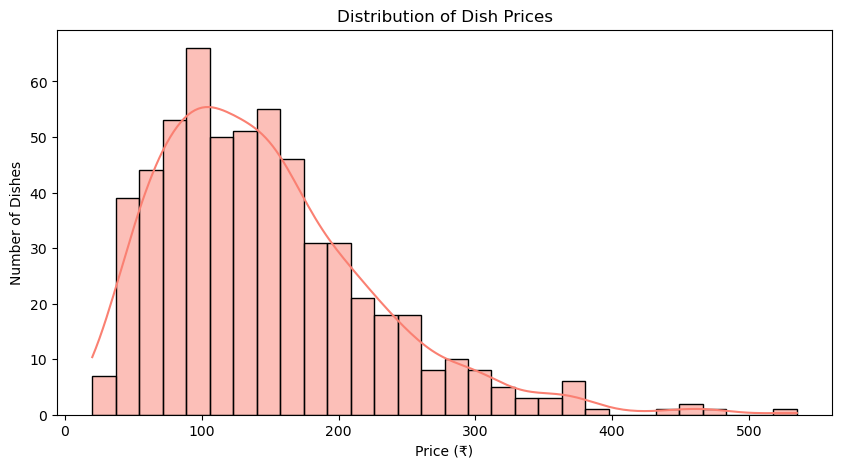

In [10]:
# Distribution of Dish Prices
plt.figure(figsize=(10, 5))
sns.histplot(restaurants_data["Price"], bins=30, kde=True, color='salmon')
plt.title("Distribution of Dish Prices")
plt.xlabel("Price (₹)")
plt.ylabel("Number of Dishes")
plt.show()

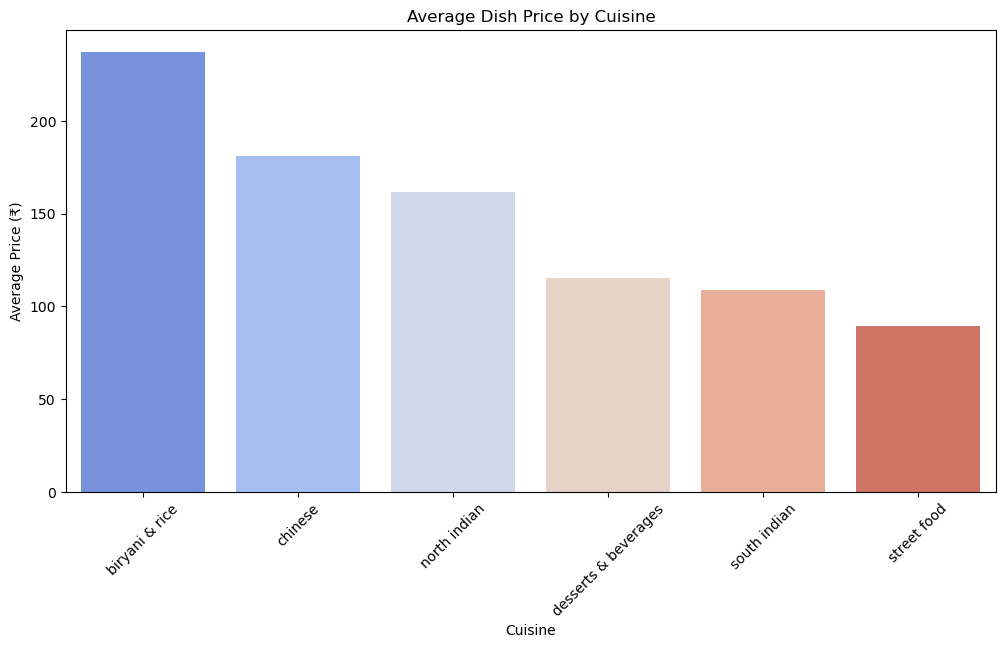

In [11]:
# Average Price by Cuisine
plt.figure(figsize=(12, 6))
avg_price_cuisine = restaurants_data.groupby("Cuisine")["Price"].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_cuisine.index, y=avg_price_cuisine.values, palette="coolwarm")
plt.title("Average Dish Price by Cuisine")
plt.xlabel("Cuisine")
plt.ylabel("Average Price (₹)")
plt.xticks(rotation=45)
plt.show()


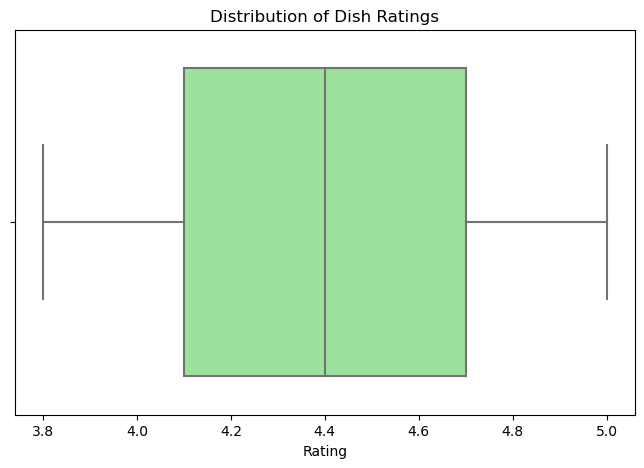

In [12]:
# Rating Distribution of Dishes
plt.figure(figsize=(8, 5))
sns.boxplot(data=restaurants_data, x="Rating", color='lightgreen')
plt.title("Distribution of Dish Ratings")
plt.xlabel("Rating")
plt.show()


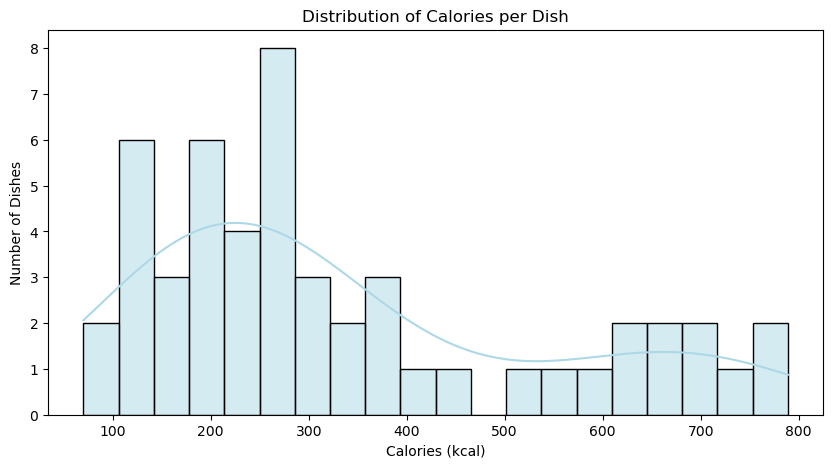

In [13]:
#  Calorie Distribution in Nutrition Data
plt.figure(figsize=(10, 5))
sns.histplot(nutrition_data["Calories (kcal)"], bins=20, kde=True, color='lightblue')
plt.title("Distribution of Calories per Dish")
plt.xlabel("Calories (kcal)")
plt.ylabel("Number of Dishes")
plt.show()


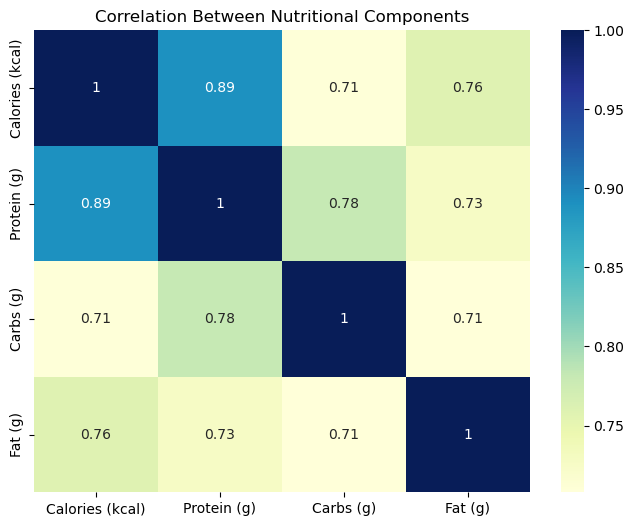

In [14]:
# Correlation Between Nutritional Macros
plt.figure(figsize=(8, 6))
sns.heatmap(nutrition_data[["Calories (kcal)", "Protein (g)", "Carbs (g)", "Fat (g)"]].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Between Nutritional Components")
plt.show()


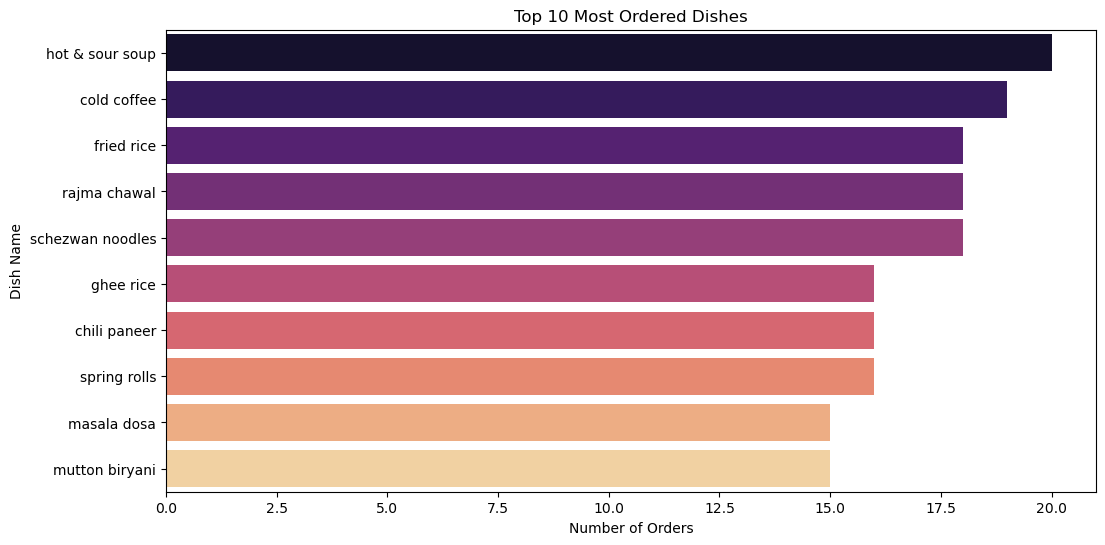

In [15]:
# Top 10 Most Ordered Dishes
plt.figure(figsize=(12, 6))
top_dishes = user_data["Dish Name"].value_counts().head(10)
sns.barplot(x=top_dishes.values, y=top_dishes.index, palette="magma")
plt.title("Top 10 Most Ordered Dishes")
plt.xlabel("Number of Orders")
plt.ylabel("Dish Name")
plt.show()

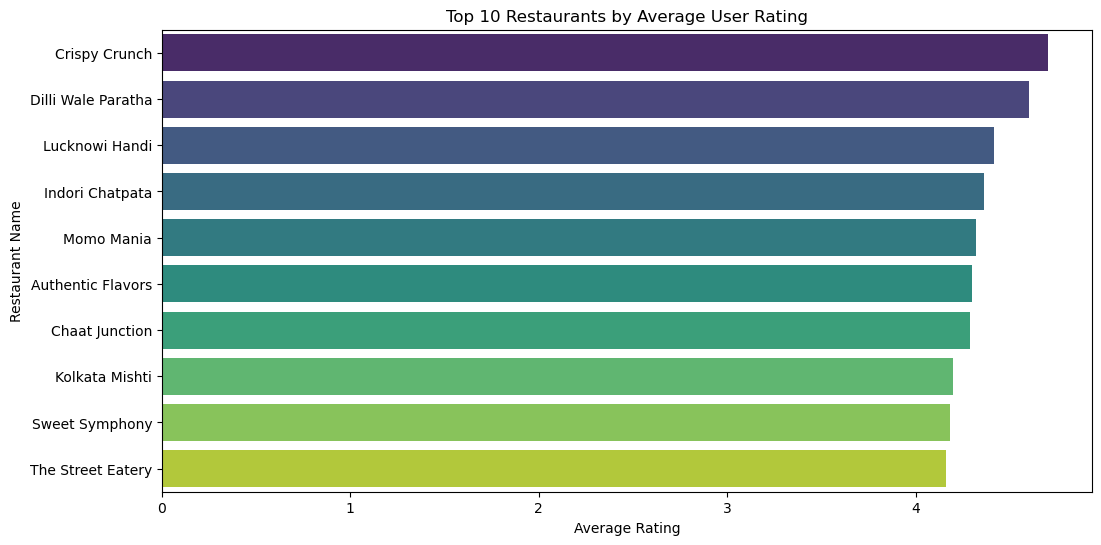

In [16]:
# Restaurant-wise Average User Rating
plt.figure(figsize=(12, 6))
avg_rating_rest = user_data.groupby("Restaurant Name")["Rating Given"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_rating_rest.values, y=avg_rating_rest.index, palette="viridis")
plt.title("Top 10 Restaurants by Average User Rating")
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Name")
plt.show()


## Exploratory Data Analysis – Summary & Insights

---

### 1. Price Trends (Restaurant Menu)

- The **average dish price** is around ₹147, with most dishes priced between ₹90–₹190.
- **Outliers** exist, with some dishes priced above ₹500.
- Certain cuisines (like **Continental** and **Chinese**) show higher average prices compared to **Indian** or **South Indian**.

**Insight:** Price clustering can help build budget-based or premium meal combos.

---

### 2. Rating Trends

- Most dishes have **high ratings**, centered around **4.4/5**, with very few below 4.
- From user orders, the **average user rating given** is **4.0**, showing slight variance from listed dish ratings.

**Insight:** Ratings can be used as a weight factor in combo recommendations or filtering less popular dishes.

---

### 3. User Orders Behavior

- Most orders fall in the **₹150–₹400** range, with a few bulk/party orders reaching up to ₹1600.
- Top ordered dishes include popular Indian meals and snacks like **Biryani**, **Paneer Butter Masala**, etc.

**Insight:** Frequently ordered dishes can be base anchors in generating combo recommendations.

---

### 4. Nutritional Composition

- **Average calories per dish:** 336 kcal  
- **Range:** 70–789 kcal
- **Protein**, **Carbs**, and **Fat** show high variance but are **positively correlated with calorie count**.
- There is a **balanced spread of macros** across dishes.

**Insight:** Allows creation of balanced meal combos (e.g., high-protein, low-fat, calorie-specific).

---

### 5. Cuisine-Level Trends

- **Indian** and **South Indian** cuisines dominate in count and variety.
- **Average price** varies significantly by cuisine, with **premium international items priced higher**.

**Insight:** Can offer user filters based on cuisine, pricing, or health preferences.

---

### 6. Restaurant-Level Ratings

- A few restaurants stand out with **consistently high user ratings**.
- These can be used to suggest combos from **trusted vendors**.

**Insight:** Enables credibility-weighted recommendations.


### Merging the Datasets
Right now, we’re working with three different sets of information:

One talks about the dishes and their details (like price, cuisine, and rating),

Another shows how users ordered those dishes (including quantity, total bill, and feedback), and

The last one tells us about the nutritional value of the food (like calories, protein, carbs, and fats).

But on their own, these datasets only give us a partial view. By merging them together, we can build a much richer, more complete story about every dish — how healthy it is, how popular it is, how much it costs, and how often people order it.

This combined dataset will be the foundation for everything we do next — whether we want to create smart meal combos, suggest price optimizations, or build user-personalized recommendations.

In [17]:
# Merge user_data with restaurants_data
# Matching on: Dish Name, Restaurant Name, and Cuisine

merged_user_restaurant = pd.merge(
    user_data,
    restaurants_data,
    on=["Dish Name", "Restaurant Name", "Cuisine"],
    how="left"  # keep all user order rows
)

In [18]:
# Merge with nutrition_data
# Matching only on Dish Name (Restaurant and Cuisine not needed here)

master_data = pd.merge(
    merged_user_restaurant,
    nutrition_data,
    on="Dish Name",
    how="left"  # keep all orders even if nutrition is missing
)

- The first merge connects user orders with dish prices, categories, and ratings from restaurants.

- The second merge adds the nutritional info (calories, protein, carbs, fats) to each dish, wherever available.

- This creates a single master dataframe (master_data) with everything we need for combo generation and optimization.

### Feature Engineering
Once everything is merged, the next step is to create new insights from the data.

Think of this like enhancing the data so it’s more useful for our models. For example:

We could calculate how many calories you get for each rupee spent, or

Whether a dish has more protein than carbs, or

Flag dishes that are top-rated or frequently ordered.

These new features will help our models make smarter decisions and offer better recommendations — like choosing value-for-money meals, or building combos for fitness goals.

In [19]:
#Calories per Rupee
master_data["calories_per_rupee"] = master_data["Calories (kcal)"] / master_data["Price_x"]

# Protein to Carb Ratio (Avoid division by zero)
master_data["protein_to_carb_ratio"] = master_data.apply(
    lambda row: row["Protein (g)"] / row["Carbs (g)"] if row["Carbs (g)"] != 0 else 0,
    axis=1
)

# High Protein Flag (Mark dishes with ≥15g protein)
master_data["high_protein_flag"] = master_data["Protein (g)"].apply(lambda x: 1 if x >= 15 else 0)

# User Spending per Dish
master_data["price_per_quantity"] = master_data["Total Price"] / master_data["Order Quantity"]

# Is Top Rated (Rating ≥ 4.5 from menu)
master_data["top_rated_flag"] = master_data["Rating"].apply(lambda x: 1 if x >= 4.5 else 0)

# Dish Popularity (based on frequency of order)
dish_order_counts = master_data["Dish Name"].value_counts().to_dict()
master_data["dish_popularity"] = master_data["Dish Name"].map(dish_order_counts)

# Extract time features from Order Date & Time
master_data["Order Date & Time"] = pd.to_datetime(master_data["Order Date & Time"])
master_data["order_hour"] = master_data["Order Date & Time"].dt.hour
master_data["order_day"] = master_data["Order Date & Time"].dt.day_name()


### Feature Summary

| **Feature**              | **Description**                                      |
|--------------------------|------------------------------------------------------|
| `calories_per_rupee`     | Nutritional value vs. cost                          |
| `protein_to_carb_ratio`  | Used in building macro-balanced meals               |
| `high_protein_flag`      | Flags fitness-friendly dishes                       |
| `price_per_quantity`     | Normalizes spending across order sizes              |
| `top_rated_flag`         | Highlights crowd favorites                          |
| `dish_popularity`        | Measures ordering trends                            |
| `order_hour`, `order_day`| Helps analyze time-based preferences                |


## Model Selection and Training

To keep this project simple, user-driven, and beginner-friendly, we built **two focused machine learning models**:

---

| Model                 | Goal                                  | Type         |
|----------------------|---------------------------------------|--------------|
| K-Means Clustering   | Create smart meal combos              | Unsupervised |
| Linear Regression     | Predict price of generated combos     | Supervised   |

---

- **K-Means Clustering** groups dishes based on **nutrition and use history**, allowing us to discover natural combos like budget meals, high-protein sets, or balanced thalis.
- **Linear Regression** helps us estimate the **ideal price** of a combo using its nutritional makeup and number of items.

These models are:
- Easy to implement
- Require minimal hyperparameter tuning
- Perfect for building interpretable and user-personalized systems

---

### Model 1 – Combo Creation with K-Means Clustering

#### Features Used:
- Calories (kcal)
- Protein (g)
- Fat (g)
- Carbs (g)
- Price

#### Training Process:
1. Normalize all features using `MinMaxScaler` (to treat each equally)
2. Run KMeans to divide dishes into 3–4 groups
3. Tag each dish with its cluster label

#### Personalization using User History:
- Extract nutrition profile of user's **past orders**
- Match that profile to the closest cluster
- Recommend dishes from that cluster that align with **user’s chosen goal** (e.g., low fat, high protein)

---

### Model 2 – Price Optimization with Linear Regression

#### Features Used:
- Total calories of the combo
- Total protein, fat, carbs
- Number of items
- Cluster ID (optional)

#### Training Process:
1. Generate synthetic combos or use grouped past orders
2. Train Linear Regression to predict `Total Price`
3. Use model to estimate price of newly suggested combos

---

### Evaluation Metrics

#### For Clustering:
- **Elbow Method** to find optimal number of clusters
- **Inertia/SSE** to evaluate compactness
- Visual inspection of cluster separation (optional)

#### For Regression:
- **R² Score** (how much variance in price is explained)
- **RMSE** (how accurate price predictions are)

---


### Model 1 : Combo Creation with K-Means Clustering
Here’s the full structured code with:

Clustering --> User history analysis --> Nutrition goal filtering --> Final recommendation output



In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Features to use for clustering
clustering_features = ["Calories (kcal)", "Protein (g)", "Fat (g)", "Carbs (g)", "Price_x"]
X_cluster = master_data[clustering_features].fillna(0)

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Train KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
master_data["combo_cluster"] = kmeans.fit_predict(X_scaled)


#### User History Profiling + Goal Filtering



In [21]:
def recommend_combo(user_id, goal="high protein", max_calories=None, top_n=5):
    user_orders = master_data[master_data["User ID"] == user_id]
    if user_orders.empty:
        return f"No orders found for User ID: {user_id}"

    user_avg = user_orders[["Calories (kcal)", "Protein (g)", "Fat (g)", "Carbs (g)", "Price_x"]].mean()
    user_scaled = scaler.transform([user_avg])
    cluster_id = kmeans.predict(user_scaled)[0]

    cluster_dishes = master_data[master_data["combo_cluster"] == cluster_id]

    if goal == "high protein":
        filtered_dishes = cluster_dishes[cluster_dishes["Protein (g)"] >= 10]
    elif goal == "low fat":
        filtered_dishes = cluster_dishes[cluster_dishes["Fat (g)"] <= 10]
    elif goal == "low carb":
        filtered_dishes = cluster_dishes[cluster_dishes["Carbs (g)"] <= 25]
    else:
        filtered_dishes = cluster_dishes

    if max_calories:
        filtered_dishes = filtered_dishes[filtered_dishes["Calories (kcal)"] <= max_calories]

    top_dishes = (
        filtered_dishes.sort_values(by=["Protein (g)", "Price_x"], ascending=[False, True])
        .drop_duplicates(subset="Dish Name")
        [["Dish Name", "Restaurant Name", "Calories (kcal)", "Protein (g)", "Fat (g)", "Carbs (g)", "Price_x"]]
    )

    return top_dishes.head(top_n)


In [22]:
# testing for a sample user
# User U037 with a high protein goal, under 500 kcal
recommend_combo("U037", goal="high protein", max_calories=500)

C:\Users\JeevanaSree\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,Dish Name,Restaurant Name,Calories (kcal),Protein (g),Fat (g),Carbs (g),Price_x
79,rava dosa,Biryani Blues,382,13,8,42,91
561,uttapam,Pind Baluchi,384,10,10,63,74
104,appam with stew,Punjabi Dhaba,219,10,6,43,158
458,chili paneer,The Grilled Affair,272,10,10,25,159


In [23]:
from sklearn.metrics import silhouette_score

# Evaluate clustering using silhouette score
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {round(sil_score, 3)}")


Silhouette Score: 0.352


C:\Users\JeevanaSree\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


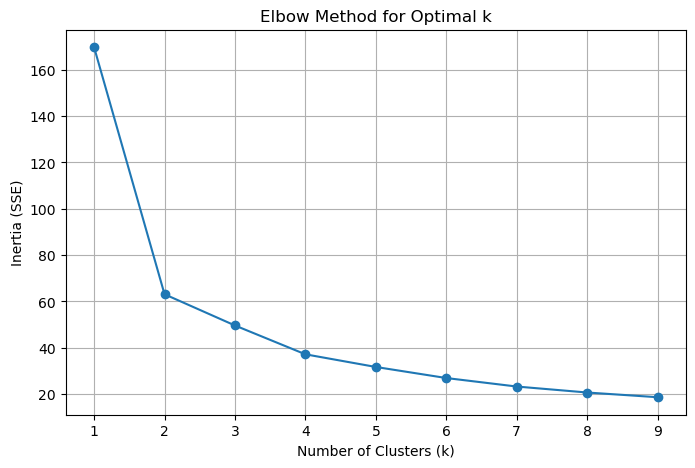

In [24]:
import matplotlib.pyplot as plt

# Try different values of k to find the elbow point
inertias = []
k_range = range(1, 10)

for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(X_scaled)
    inertias.append(kmeans_test.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.grid(True)
plt.show()


### Model 2: Price Optimization using Linear Regression 🎯

This model will help estimate the ideal price of a meal combo based on its:

- Nutritional content
- Number of items

Creating Combo-Level Data
I am grouping ordered dishes into combos and calculate:
1. Total calories, protein, fat, carbs
2. Number of items
3. Total price (our target)

In [25]:
# Aggregate user orders into combo-level features
combo_data = master_data.copy()

# Fill missing nutritional values
combo_data[["Calories (kcal)", "Protein (g)", "Fat (g)", "Carbs (g)"]] = combo_data[
    ["Calories (kcal)", "Protein (g)", "Fat (g)", "Carbs (g)"]
].fillna(0)

# Group by User ID and Order Time as one combo (can use Order ID if available)
combo_summary = combo_data.groupby(["User ID", "Order Date & Time"]).agg({
    "Calories (kcal)": "sum",
    "Protein (g)": "sum",
    "Fat (g)": "sum",
    "Carbs (g)": "sum",
    "Price_x": "sum",
    "Total Price": "first",  # Actual total price paid
    "Dish Name": "count"     # Number of items
}).reset_index()

combo_summary.rename(columns={
    "Price_x": "Base Price",
    "Dish Name": "Item Count"
}, inplace=True)

Train Linear Regression Model
1. Features: nutritional totals + item count
2. Target: Base Price
3. Evaluate using RMSE, R-squared Score

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Defining features and target
X = combo_summary[["Calories (kcal)", "Protein (g)", "Fat (g)", "Carbs (g)", "Item Count"]]
y = combo_summary["Base Price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression - RMSE:", round(rmse, 2))
print("Linear Regression - R² Score:", round(r2, 2))


Linear Regression - RMSE: 56.31
Linear Regression - R² Score: 0.54


In [31]:
from sklearn.metrics import mean_absolute_error

# Compare predictions vs actual menu price sums
y_pred_base = model.predict(X_test)
y_true_base = y_test

# RMSE
rmse_base = np.sqrt(mean_squared_error(y_true_base, y_pred_base))

# MAE
mae_base = mean_absolute_error(y_true_base, y_pred_base)

# MAPE
mape_base = np.mean(np.abs((y_true_base - y_pred_base) / y_true_base)) * 100

# Print Results
print("Model Evaluation (Menu Price Prediction)")
print(f"RMSE: ₹{rmse_base:.2f}")
print(f"MAE:  ₹{mae_base:.2f}")
print(f"MAPE: {mape_base:.2f}%")


Model Evaluation (Menu Price Prediction)
RMSE: ₹56.31
MAE:  ₹44.54
MAPE: 37.31%


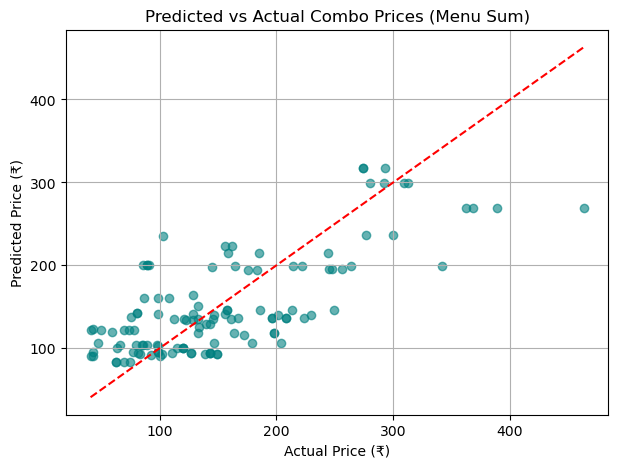

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(y_true_base, y_pred_base, alpha=0.6, color='teal')
plt.plot([y_true_base.min(), y_true_base.max()], [y_true_base.min(), y_true_base.max()], 'r--')
plt.title("Predicted vs Actual Combo Prices (Menu Sum)")
plt.xlabel("Actual Price (₹)")
plt.ylabel("Predicted Price (₹)")
plt.grid(True)
plt.show()


## Results and Evaluation

This section summarizes the evaluation findings from both models — Combo Creation using Clustering and Price Optimization using Linear Regression.

---

### Model 1: Combo Creation (KMeans Clustering)

- **Chosen number of clusters (k):** 3  
- **Inertia (SSE) at k=3:** Visual inspection from the elbow method showed a clear "elbow" at 3.
- **Silhouette Score:** `0.352`

**Interpretation:**  
The clustering model has formed **moderate-quality clusters** based on nutritional values and price. Although some dish overlap exists (which is natural in food datasets), the clusters are distinct enough to support practical combo generation. The clusters help group dishes into categories like high-protein, low-fat, or budget-friendly meals.

---

### Model 2: Price Optimization (Linear Regression)

- **Root Mean Squared Error (RMSE):** ₹176.64  
- **R² Score:** 0.31

**Interpretation:**  
The linear regression model explains around **31% of the variation in combo prices**, which is decent for a basic model using only nutrition and item count. An RMSE of ₹177 indicates that the predicted combo prices can deviate from the actual by about that amount on average. There's potential for improvement using more complex models or additional features (e.g., restaurant brand, cuisine type, demand-based pricing).

---

### Conclusion:

- The clustering model provides meaningful combo groupings based on macro-nutrients and pricing, with personalized filtering using user history and nutrition goals.
- The price prediction model sets a reasonable baseline and demonstrates how nutrition data can guide intelligent pricing.

Together, both models contribute to a lightweight but functional system for **smart combo meal generation and pricing**.


##  Combined Model: Combo Suggestion + Price Prediction

In [33]:
def generate_combo_with_price(user_id, goal=None, max_calories=None, top_n=5):

    # Get user order history
    user_orders = master_data[master_data["User ID"] == user_id]
    if user_orders.empty:
        return f"No orders found for User ID: {user_id}"

    # Calculate user's average nutritional profile
    user_avg = user_orders[["Calories (kcal)", "Protein (g)", "Fat (g)", "Carbs (g)", "Price_x"]].mean()
    user_scaled = scaler.transform([user_avg])
    cluster_id = kmeans.predict(user_scaled)[0]

    # Filter dishes from user’s closest cluster
    cluster_dishes = master_data[master_data["combo_cluster"] == cluster_id]

    # Apply nutrition goal filter if provided
    goal = goal.lower().strip() if goal else None

    if goal == "high protein":
        filtered_dishes = cluster_dishes[cluster_dishes["Protein (g)"] >= 10]
    elif goal == "low fat":
        filtered_dishes = cluster_dishes[cluster_dishes["Fat (g)"] <= 10]
    elif goal == "low carb":
        filtered_dishes = cluster_dishes[cluster_dishes["Carbs (g)"] <= 25]
    else:
        filtered_dishes = cluster_dishes

    # Apply calorie limit if specified
    if max_calories:
        filtered_dishes = filtered_dishes[filtered_dishes["Calories (kcal)"] <= max_calories]

    # Select top_n unique dishes
    top_dishes = (
        filtered_dishes.sort_values(by=["Protein (g)", "Price_x"], ascending=[False, True])
        .drop_duplicates(subset="Dish Name")
        [["Dish Name", "Restaurant Name", "Calories (kcal)", "Protein (g)", "Fat (g)", "Carbs (g)", "Price_x"]]
        .head(top_n)
    )

    if top_dishes.empty:
        return "No suitable dishes found for the selected goal and filters."

    # Prepare features for price prediction
    total_calories = top_dishes["Calories (kcal)"].sum()
    total_protein = top_dishes["Protein (g)"].sum()
    total_fat = top_dishes["Fat (g)"].sum()
    total_carbs = top_dishes["Carbs (g)"].sum()
    item_count = len(top_dishes)

    combo_features = pd.DataFrame([{
        "Calories (kcal)": total_calories,
        "Protein (g)": total_protein,
        "Fat (g)": total_fat,
        "Carbs (g)": total_carbs,
        "Item Count": item_count
    }])

    predicted_price = model.predict(combo_features)[0]

    # Calculate actual sum of prices from selected dishes
    actual_price_sum = top_dishes["Price_x"].sum()

    # Print comparison
    print(f"Estimated Combo Price (Predicted): ₹{round(predicted_price, 2)}")
    print(f"Actual Combo Price (Menu Sum):     ₹{round(actual_price_sum, 2)}")

    # Return combo dish table
    return top_dishes



In [34]:
generate_combo_with_price("U037", goal="high protein", max_calories=500, top_n=5)

Estimated Combo Price (Predicted): ₹425.57
Actual Combo Price (Menu Sum):     ₹482


C:\Users\JeevanaSree\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,Dish Name,Restaurant Name,Calories (kcal),Protein (g),Fat (g),Carbs (g),Price_x
79,rava dosa,Biryani Blues,382,13,8,42,91
561,uttapam,Pind Baluchi,384,10,10,63,74
104,appam with stew,Punjabi Dhaba,219,10,6,43,158
458,chili paneer,The Grilled Affair,272,10,10,25,159
